### Libraries and Settings

In [599]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
import math
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor


In [600]:
pd.set_option('display.max_columns', None)

### Import Data

In [601]:
X_train_T = pd.read_csv('../data/clean_train_Ting.csv')
X_test_T = pd.read_csv('../data/clean_test_Ting.csv')
X_Ktest_T = pd.read_csv('../data/clean_Ktest_Ting.csv')

X_train_L = pd.read_csv('../data/train_lanqing.csv'
                       ).drop('Unnamed: 0',axis=1).drop('Id',axis=1)
X_test_L = pd.read_csv('../data/test_lanqing.csv'
                      ).drop('Unnamed: 0',axis=1).drop('Id',axis=1)
X_Ktest_L = pd.read_csv('../data/Ktest_lanqing.csv'
                       ).drop('Unnamed: 0',axis=1).drop('Id',axis=1)

X_train_A = pd.read_csv('../data/model_train_Alex2.csv').drop('Id',axis=1)
X_test_A = pd.read_csv('../data/model_test_Alex2.csv').drop('Id',axis=1)
X_Ktest_A = pd.read_csv('../data/kaggle_test_Alex2.csv').drop('Id',axis=1)

X_train_M = pd.read_csv('../data/final_model_train.csv').drop('Unnamed: 0',axis=1).drop('Id',axis=1)
X_test_M = pd.read_csv('../data/final_model_test.csv').drop('Unnamed: 0',axis=1).drop('Id',axis=1)
X_Ktest_M = pd.read_csv('../data/final_test_df.csv').drop('Unnamed: 0',axis=1).drop('Id',axis=1)


In [602]:
X_train_M.head()

,GrLivArea,HeatingQC,CentralAir,BathCombined_AbvGr,BathCombined_Bsmt,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,Electrical_Other,Functional_Other
0,-0.319935,0.893604,0.269339,0.073843,0.939057,-1.067877,-0.224935,-0.332538,-0.950249,-1.007970,0,0
1,0.871245,0.893604,0.269339,1.342198,-0.919958,0.163397,-0.224935,0.924433,0.615183,1.185433,0,0
2,-0.929949,0.893604,0.269339,-1.194512,0.939057,0.163397,-0.224935,-0.332538,0.615183,0.637082,0,0
3,-0.553488,-0.138769,0.269339,0.073843,0.939057,-2.299151,-0.224935,-0.332538,-0.950249,-1.007970,0,0
4,0.429428,0.893604,0.269339,0.073843,0.939057,-1.067877,-0.224935,-0.961023,0.615183,1.733784,0,0


In [603]:
X_train = pd.concat([X_train_T, X_train_L, X_train_M],axis=1).set_index('Id').drop(1299)
X_test = pd.concat([X_test_T, X_test_L, X_test_M],axis=1).set_index('Id')
X_Ktest = pd.concat([X_Ktest_T, X_Ktest_L, X_Ktest_M],axis=1).set_index('Id')

print(X_train_L.shape, X_test_L.shape, X_Ktest_L.shape)
print(X_train_T.shape, X_test_T.shape, X_Ktest_T.shape)
print(X_train_M.shape, X_test_M.shape, X_Ktest_M.shape)
print(X_train_A.shape, X_test_A.shape, X_Ktest_A.shape)
print(X_train.shape, X_test.shape, X_Ktest.shape)

(1168, 61) (292, 61) (1459, 61)
(1168, 71) (292, 71) (1459, 71)
(1168, 12) (292, 12) (1459, 12)
(1168, 50) (292, 50) (1459, 50)
(1167, 143) (292, 143) (1459, 143)


In [604]:
y_train = pd.read_csv('../data/Model Train.csv').set_index('Id').drop(1299)['SalePrice']
y_test = pd.read_csv('../data/Model Test.csv')['SalePrice']

In [605]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [606]:
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

In [607]:
X_Ktest['BathCombined_Bsmt'] = X_Ktest['BathCombined_Bsmt'].fillna(-0.919958)

### Multiple Linear Model

In [608]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [609]:
rss = np.sum((y_train-lm.predict(X_train))**2)
math.sqrt(rss/X_train.shape[0])

0.103889265731614

In [610]:
rss = np.sum((y_test-lm.predict(X_test))**2)
math.sqrt(rss/X_test.shape[0])

173967896124.39435

In [611]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [612]:
rss = np.sum((y_train-lm.predict(X_train))**2)
math.sqrt(rss/X_train.shape[0])

0.10582526245709316

In [613]:
# y_Ktest = lm.predict(X_Ktest)

In [614]:
# lm_submission = pd.concat([X_Ktest.reset_index()['Id'],
#                            pd.DataFrame(math.e**(y_Ktest),columns=['SalePrice'])],axis=1)

In [615]:
# lm_submission.to_csv('../submission/lm.csv',index=False)

### Lasso

In [616]:
lasso = Lasso(max_iter=10000)

alpha = 10**np.linspace(-8,0,50)
params = {'alpha': alpha}
grid_search_lasso = GridSearchCV( estimator=lasso, param_grid=params )
grid_search_lasso.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-08, 1.45634848e-08, 2.12095089e-08, 3.08884360e-08,
       4.49843267e...
       1.67683294e-03, 2.44205309e-03, 3.55648031e-03, 5.17947468e-03,
       7.54312006e-03, 1.09854114e-02, 1.59985872e-02, 2.32995181e-02,
       3.39322177e-02, 4.94171336e-02, 7.19685673e-02, 1.04811313e-01,
       1.52641797e-01, 2.22299648e-01, 3.23745754e-01, 4.71486636e-01,
       6.86648845e-01, 1.00000000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [617]:
grid_search_lasso.best_params_

{'alpha': 0.0003727593720314938}

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


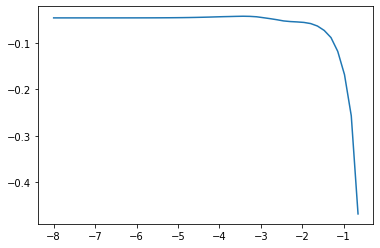

In [619]:
plt.plot(np.log10(alpha),np.log10(grid_search_lasso.cv_results_['mean_test_score']))

In [620]:
rss = np.sum((y_train-grid_search_lasso.predict(X_train))**2)
print(math.sqrt(rss/X_train.shape[0]))
rss = np.sum((y_test-grid_search_lasso.predict(X_test))**2)
print(math.sqrt(rss/X_test.shape[0]))

0.10807138513628338
0.13233247611258867


In [304]:
y_Ktest = grid_search_lasso.predict(X_Ktest)
lasso_submission = pd.concat([X_Ktest.reset_index()['Id'],
                            pd.DataFrame(math.e**(y_Ktest),columns=['SalePrice'])],axis=1)
lasso_submission.to_csv('../submission/lasso.csv',index=False)

['importances', 'importances_mean', 'importances_std']


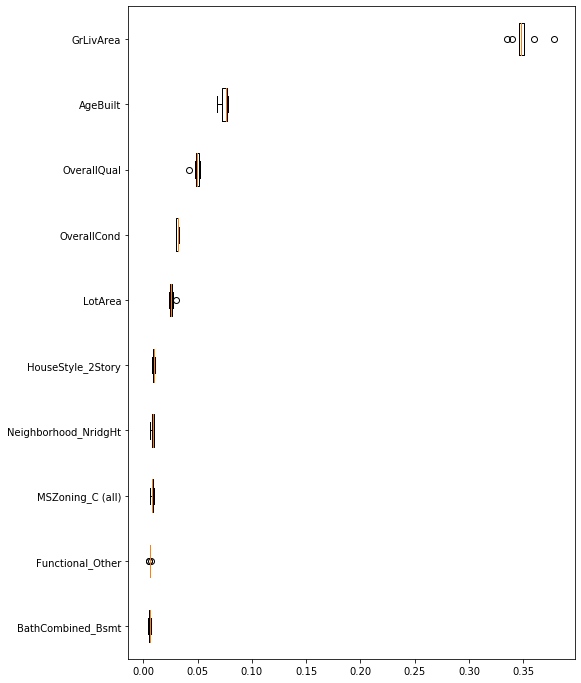

In [637]:
impt_lasso = permutation_importance(grid_search_lasso, X_train, y_train, n_repeats=10,
                                random_state=42)
print(dir(impt_lasso))
perm_sorted_idx = impt_lasso.importances_mean.argsort()[-10:]
plt.figure(figsize=(8,12))
plt.boxplot(impt_lasso.importances[perm_sorted_idx].T, vert=False,
            labels=X_train.columns[perm_sorted_idx])
plt.savefig('../fig/lasso_top20.png')

In [625]:
col_dict = {}
for col in X_train.columns:
    if col.split('_')[0] in col_dict:
        col_dict[col.split('_')[0]].append(col)
    else:
        col_dict[col.split('_')[0]] = [col]

In [629]:
import math

features = list(col_dict.keys())
feature_imp = []
feature_imp_std = []
for feature in features:
    mean_list = []
    var_list = []
    for sub_cat in col_dict[feature]:
        loc = X_train.columns.get_loc(sub_cat)
        mean_list.append(impt_lasso.importances_mean[loc])
        var_list.append(impt_lasso.importances_std[loc]**2)
    feature_imp.append(sum(mean_list))
    feature_imp_std.append(math.sqrt(sum(var_list)))
        

In [631]:
df_imp = pd.DataFrame({'Feature':features,
                       'Importance':feature_imp,
                       'STD':feature_imp_std})

In [632]:
df_imp = df_imp.sort_values(by='Importance',ascending=False)

In [633]:
df_imp

,Feature,Importance,STD
37,GrLivArea,0.350202,0.011379
15,AgeBuilt,0.074908,0.003346
13,OverallQual,0.049340,0.002842
14,OverallCond,0.031546,0.001159
9,Neighborhood,0.031347,0.001845
18,LotArea,0.025691,0.001665
12,HouseStyle,0.012470,0.001004
1,MSZoning,0.009698,0.001008
40,BathCombined,0.007365,0.000792
47,Functional,0.006236,0.000506


In [638]:
for i in range(len(impt_lasso.importances)):
    print(impt_lasso.importances_mean[i],X.columns[i])

0.0009719015143650145 MSSubClass_PUD
0.008388260493443633 MSZoning_C (all)
0.0004749143641139764 MSZoning_FV
0.0 MSZoning_RH
0.0008352290194261647 MSZoning_RM
0.0 Street_Grvl
0.0 Alley_Grvl
0.00017194241103206663 Alley_Pave
0.0 LotShape_IR1
0.0 LotShape_IR2
0.0 LotShape_IR3
0.0010834739502769142 LandContour_Bnk
6.43390107398778e-06 LandContour_HLS
0.0 LandContour_Low
0.0 Utilities_NoSeWa
2.457953365073706e-05 LotConfig_Corner
0.00031640652917084287 LotConfig_CulDSac
0.0005370021765981004 LotConfig_FR2
0.0 LotConfig_FR3
8.731569817819196e-05 LandSlope_Mod
0.0 LandSlope_Sev
0.0 Neighborhood_Blmngtn
0.0 Neighborhood_Blueste
0.0 Neighborhood_BrDale
0.0006901307980287319 Neighborhood_BrkSide
0.000602917441516937 Neighborhood_ClearCr
1.4216459337923482e-05 Neighborhood_CollgCr
0.005121273783295977 Neighborhood_Crawfor
0.004319966449821766 Neighborhood_Edwards
0.0012409570901421806 Neighborhood_Gilbert
0.0007687608259331569 Neighborhood_IDOTRR
0.00012097214108042209 Neighborhood_MeadowV
0.000

### Random Forest

In [318]:
randomForest = RandomForestRegressor()

In [393]:
grid_para_forest = [{
    "n_estimators": [1000],
    "min_samples_leaf": [1],
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

CPU times: user 15.2 s, sys: 231 ms, total: 15.4 s
Wall time: 51.1 s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [395]:
grid_search_forest.best_params_

{'min_samples_leaf': 1, 'n_estimators': 1000, 'random_state': 42}

In [396]:
# plt.plot([1,2,4,6],grid_search_forest.cv_results_['mean_test_score'])

In [397]:
rss = np.sum((y_train-grid_search_forest.predict(X_train))**2)
math.sqrt(rss/X_train.shape[0])

0.051429125474681495

In [398]:
rss = np.sum((y_test-grid_search_forest.predict(X_test))**2)
math.sqrt(rss/X_test.shape[0])

0.1494379886138602

In [399]:
y_Ktest = grid_search_forest.predict(X_Ktest)
forest_submission = pd.concat([X_Ktest.reset_index()['Id'],
                            pd.DataFrame(math.e**(y_Ktest),columns=['SalePrice'])],axis=1)
forest_submission.to_csv('../submission/forest.csv',index=False)

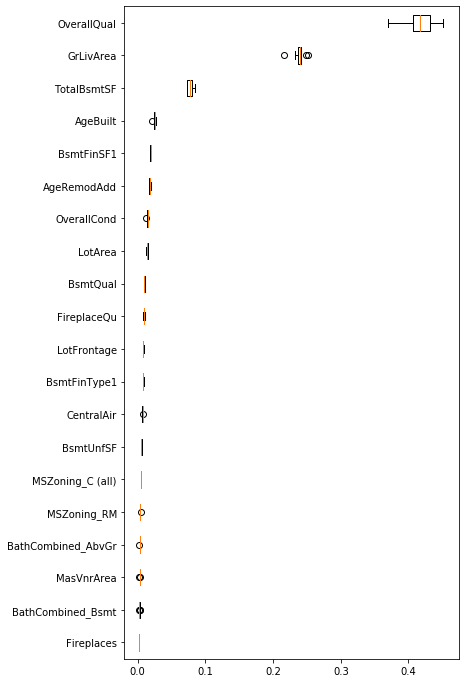

In [400]:
result = permutation_importance(grid_search_forest, X_train, y_train, n_repeats=10,
                                random_state=42)

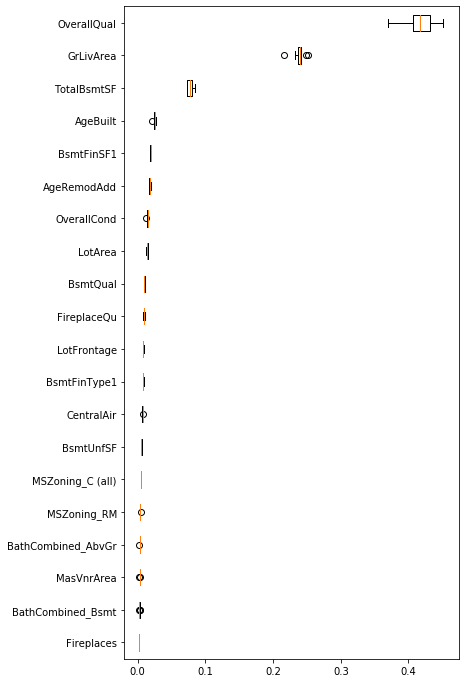

In [402]:
impt_forest = result
perm_sorted_idx = impt_forest.importances_mean.argsort()[-20:]
plt.figure(figsize=(6,12))
plt.boxplot(impt_forest.importances[perm_sorted_idx].T, vert=False,
            labels=X_train.columns[perm_sorted_idx])
plt.savefig('../fig/forest_top20.png')

### Polynomial

In [507]:
num_cols = X_train.columns[X_train.apply(lambda col: col.nunique()) > 2]
poly_names = np.hstack((num_square.columns.map(lambda name: name+'^2'),
            num_square.columns.map(lambda name: name+'^3')))

In [508]:
def add_poly(df):
    df_temp = df.copy()
    num_square = df_temp[num_cols].apply(lambda col: np.power(col,2))
    num_cube = df_temp[num_cols].apply(lambda col: np.power(col,3))
    poly = pd.concat([num_square,num_cube],axis=1)
    return(poly)

In [509]:
X_train_poly = add_poly(X_train)
X_test_poly = add_poly(X_test)
X_Ktest_poly = add_poly(X_Ktest)

In [510]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl = scl.fit(X_train_poly)

In [511]:
X_train_poly = pd.DataFrame(scl.transform(X_train_poly),columns=poly_names)
X_test_poly = pd.DataFrame(scl.transform(X_test_poly),columns=poly_names)
X_Ktest_poly = pd.DataFrame(scl.transform(X_Ktest_poly),columns=poly_names)

In [512]:
X_train_poly = pd.concat([X_train.reset_index(),X_train_poly],axis=1).set_index('Id')
X_test_poly = pd.concat([X_test.reset_index(),X_test_poly],axis=1).set_index('Id')
X_Ktest_poly = pd.concat([X_Ktest.reset_index(),X_Ktest_poly],axis=1).set_index('Id')

In [513]:
X_train_poly

,MSSubClass_PUD,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RM,Street_Grvl,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual,OverallCond,AgeBuilt,AgeRemodAdd,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,RoofStyle_Flat,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_Slab,Foundation_Stone,Foundation_Wood,GrLivArea,HeatingQC,CentralAir,BathCombined_AbvGr,BathCombined_Bsmt,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,Electrical_Other,Functional_Other,OverallQual^2,OverallCond^2,AgeBuilt^2,AgeRemodAdd^2,LotFrontage^2,LotArea^2,MasVnrArea^2,BsmtFinSF1^2,BsmtFinSF2^2,BsmtUnfSF^2,TotalBsmtSF^2,ExterQual^2,ExterCond^2,BsmtQual^2,BsmtCond^2,BsmtExposure^2,BsmtFinType1^2,BsmtFinType2^2,GrLivArea^2,HeatingQC^2,BathCombined_AbvGr^2,BathCombined_Bsmt^2,BedroomAbvGr^2,KitchenAbvGr^2,TotRmsAbvGrd^2,Fireplaces^2,FireplaceQu^2,OverallQual^3,OverallCond^3,AgeBuilt^3,AgeRemodAdd^3,LotFrontage^3,LotArea^3,MasVnrArea^3,BsmtFinSF1^3,BsmtFinSF2^3,BsmtUnfSF^3,TotalBsmtSF^3,ExterQual^3,ExterCond^3,BsmtQual^3,BsmtCond^3,BsmtExposure^3,BsmtFinType1^3,BsmtFinType2^3,GrLivArea^3,HeatingQC^3,BathCombined_AbvGr^3,BathCombined_Bsmt^3,BedroomAbvGr^3,KitchenAbvGr^3,TotRmsAbvGrd^3,Fireplaces^3,FireplaceQu^3
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.376896,-0.520013,-0.947332,-0.770140,0.445879,-0.546584,1.065650,0.887227,-0.354558,-0.019790,0.340661,1.054403,-0.25651,1.706176,0.127441,-0.597713,1.148813,-0.276269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.319935,0.893604,0.269339,0.073843,0.939057,-1.067877,-

In [524]:
lasso_poly = Lasso(max_iter=10000,tol = 0.01)

alpha = 10**np.linspace(-8,0,10)
params = {'alpha': alpha}
grid_search_lasso_poly= GridSearchCV( estimator=lasso_poly, param_grid=params )
grid_search_lasso_poly.fit(X_train_poly,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8427613684601627, tolerance: 1.4725359278478445
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.307599037074948, tolerance: 1.4663812775218423
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.269041785852963, tolerance: 1.4478587435715895
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.914533

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.01, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-08, 7.74263683e-08, 5.99484250e-07, 4.64158883e-06,
       3.59381366e-05, 2.78255940e-04, 2.15443469e-03, 1.66810054e-02,
       1.29154967e-01, 1.00000000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

{'alpha': 0.0002782559402207126}


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


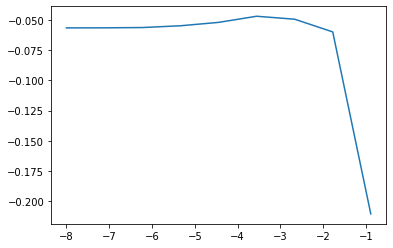

In [537]:
print(grid_search_lasso_poly.best_params_)
plt.plot(np.log10(alpha),np.log10(grid_search_lasso_poly.cv_results_['mean_test_score']))

In [530]:
rss = np.sum((y_train-grid_search_lasso_poly.predict(X_train_poly))**2)
print(math.sqrt(rss/X_train_poly.shape[0]))
rss = np.sum((y_test-grid_search_lasso_poly.predict(X_test_poly))**2)
print(math.sqrt(rss/X_test_poly.shape[0]))

0.10206328638950626
0.1363095249234289


In [532]:
y_Ktest = grid_search_lasso_poly.predict(X_Ktest_poly)
lasso_poly_submission = pd.concat([X_Ktest_poly.reset_index()['Id'],
                            pd.DataFrame(math.e**(y_Ktest),columns=['SalePrice'])],axis=1)
lasso_poly_submission.to_csv('../submission/lasso_poly.csv',index=False)
# 0.12865 on Kaggle

### KNN

In [534]:
from sklearn.neighbors import KNeighborsRegressor

In [553]:
knn = KNeighborsRegressor()

n_nbs = [1,2,3,4,5,6,7,8,9,10]
wgt = ['distance']
p = [1]
params = {'n_neighbors': n_nbs,'weights':wgt,'p':p}
grid_search_knn= GridSearchCV( estimator=knn, param_grid=params )
grid_search_knn.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1], 'weights': ['distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


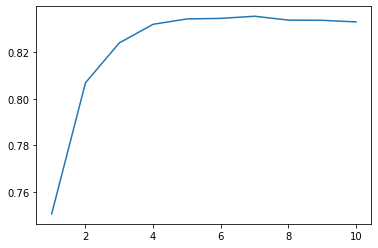

In [555]:
print(grid_search_knn.best_params_)
plt.plot(n_nbs,grid_search_knn.cv_results_['mean_test_score'])

In [556]:
rss = np.sum((y_train-grid_search_knn.predict(X_train))**2)
print(math.sqrt(rss/X_train.shape[0]))
rss = np.sum((y_test-grid_search_knn.predict(X_test))**2)
print(math.sqrt(rss/X_test.shape[0]))

0.0011609964305452686
0.18170279036060782


### AdaBoost

In [558]:
from sklearn.ensemble import AdaBoostRegressor

In [569]:

ada = AdaBoostRegressor()

n_estimators = [60,70,80,90,100]
learning_rate = [0.3,0.4,0.5,0.6,0.7]

params = {'n_estimators':n_estimators,'learning_rate':learning_rate}
grid_search_ada= GridSearchCV( estimator=ada, param_grid=params )
%time grid_search_ada.fit(X_train,y_train)

CPU times: user 58.2 s, sys: 411 ms, total: 58.6 s
Wall time: 58.8 s


GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.3, 0.4, 0.5, 0.6, 0.7],
                         'n_estimators': [60, 70, 80, 90, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [570]:
print(grid_search_ada.best_params_)

{'learning_rate': 0.5, 'n_estimators': 90}


In [571]:
rss = np.sum((y_train-grid_search_ada.predict(X_train))**2)
print(math.sqrt(rss/X_train.shape[0]))
rss = np.sum((y_test-grid_search_ada.predict(X_test))**2)
print(math.sqrt(rss/X_test.shape[0]))

0.14877788602684927
0.1818270706726353


### Gradient Boosting

In [572]:
from sklearn.ensemble import GradientBoostingRegressor

In [579]:
gb = GradientBoostingRegressor()

max_depth = [2,3,4]
n_estimators = [250,275,300,325,350]
learning_rate = [0.03,0.04,0.05,0.06,0.07]

params = {'max_depth':max_depth,'n_estimators':n_estimators,'learning_rate':learning_rate}
grid_search_gb= GridSearchCV( estimator=gb, param_grid=params )
%time grid_search_gb.fit(X_train,y_train)

CPU times: user 7min 14s, sys: 1.56 s, total: 7min 16s
Wall time: 7min 22s


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...nge=None,
                   

In [585]:
print(grid_search_gb.best_params_)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 275}


In [582]:
rss = np.sum((y_train-grid_search_gb.predict(X_train))**2)
print(math.sqrt(rss/X_train.shape[0]))
rss = np.sum((y_test-grid_search_gb.predict(X_test))**2)
print(math.sqrt(rss/X_test.shape[0]))

0.07419599557330162
0.13635674289474112


In [593]:
gb = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=275)

In [594]:
gb.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=275,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [596]:
y_Ktest = gb.predict(X_Ktest)
gb_submission = pd.concat([X_Ktest.reset_index()['Id'],
                            pd.DataFrame(math.e**(y_Ktest),columns=['SalePrice'])],axis=1)
gb_submission.to_csv('../submission/gb.csv',index=False)
# 0.12865 on Kaggle